## Q1. Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q2.import csv file Diwali Sales Data.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Diwali Sales Data.csv to Diwali Sales Data.csv


## Q3. Find the shape of the data

In [ ]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df.shape

(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Q5. Get the complete info of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [ ]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


## Q7. Check for null values and find which columns have null values

In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [ ]:
# df[['Age', 'Orders', 'Amount']].describe()
df[['Age', 'Orders', 'Amount']].describe().loc['mean']

,mean
Age,35.421207
Orders,2.489290
Amount,9453.610858


## Q9. Plot a bar chart for Gender and it's count

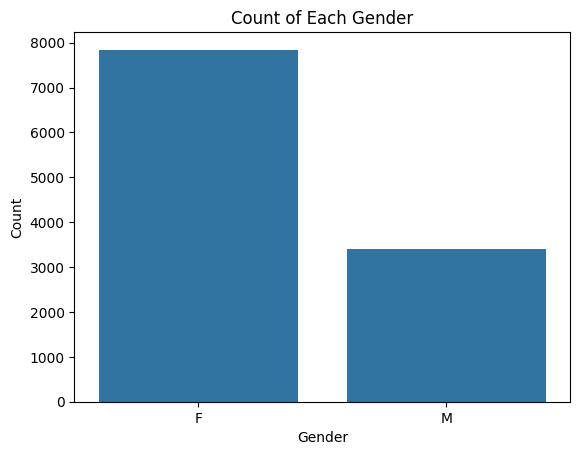

In [ ]:
sns.countplot(x='Gender',data=df)
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Q10. Plot a bar chart for gender vs total amount

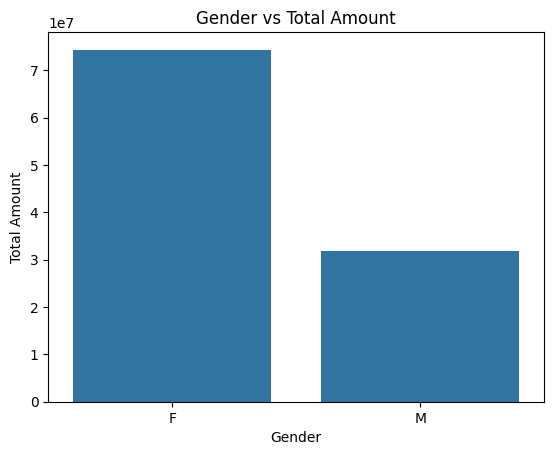

In [ ]:
gender_total_amount = df.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Amount', data=gender_total_amount)
plt.title('Gender vs Total Amount')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

## Q11. Plot the countplot for Age Group with hue and Gender

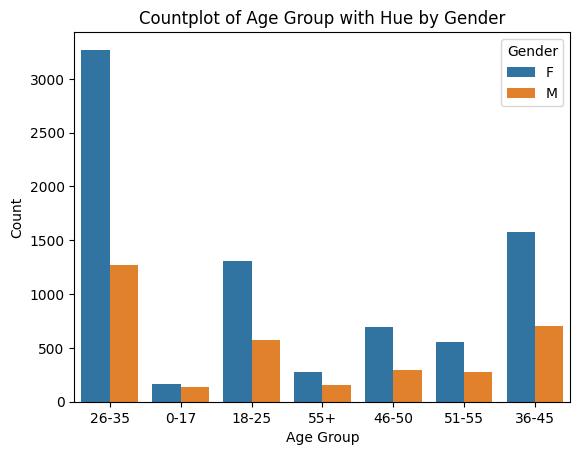

In [ ]:
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Countplot of Age Group with Hue by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## Q12. Draw the plot for total number of orders from top 10 states

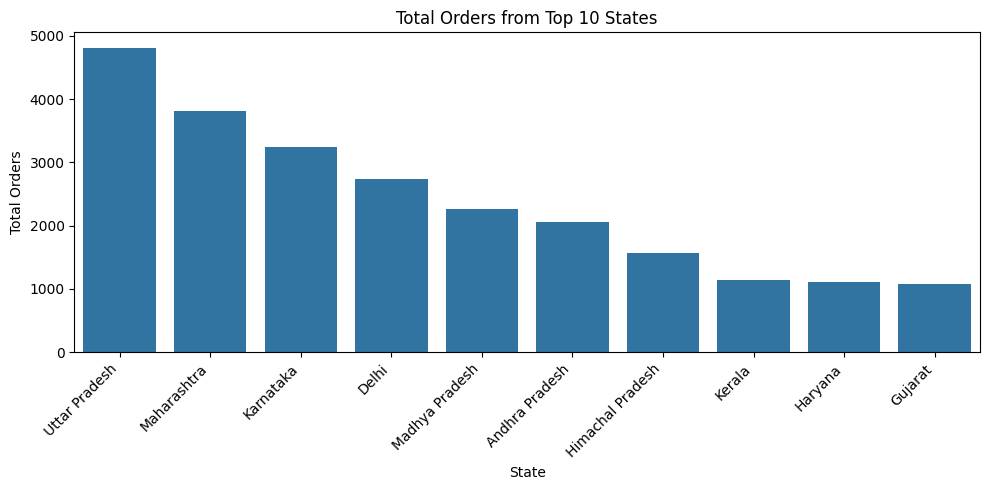

In [ ]:
sales_state = df.groupby(['State'])['Orders'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_state.index, y=sales_state.values)
plt.title('Total Orders from Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q13.Draw the plot to plot total amount/sales from top 10 states

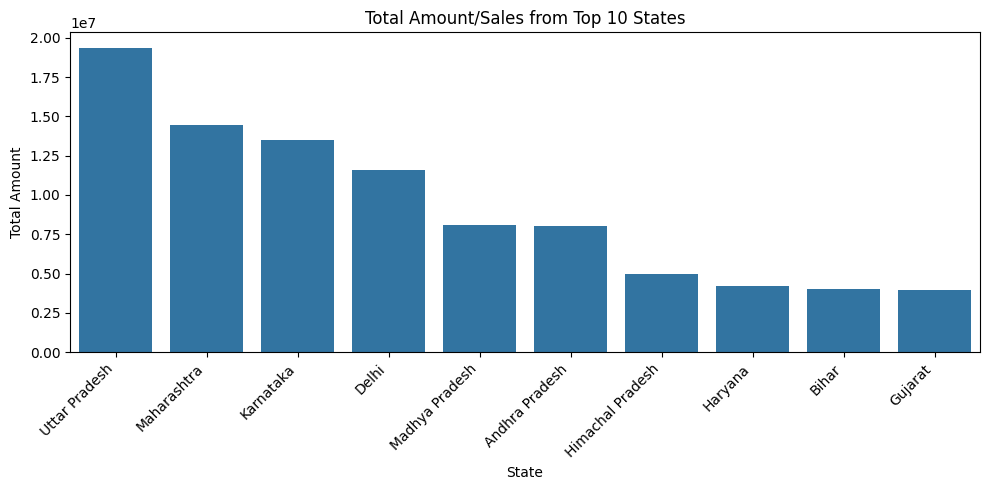

In [ ]:
sales_state_amount = df.groupby(['State'])['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_state_amount.index, y=sales_state_amount.values)
plt.title('Total Amount/Sales from Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q14. Draw the plot to show the marital status

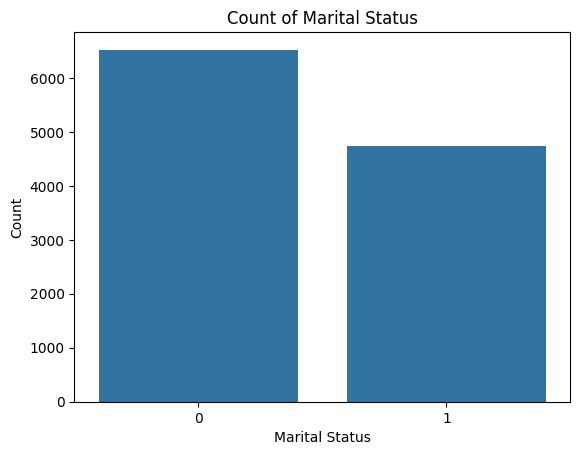

In [ ]:
sns.countplot(x='Marital_Status', data= df)
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Q15. Draw the plot to show the top 10 occupations

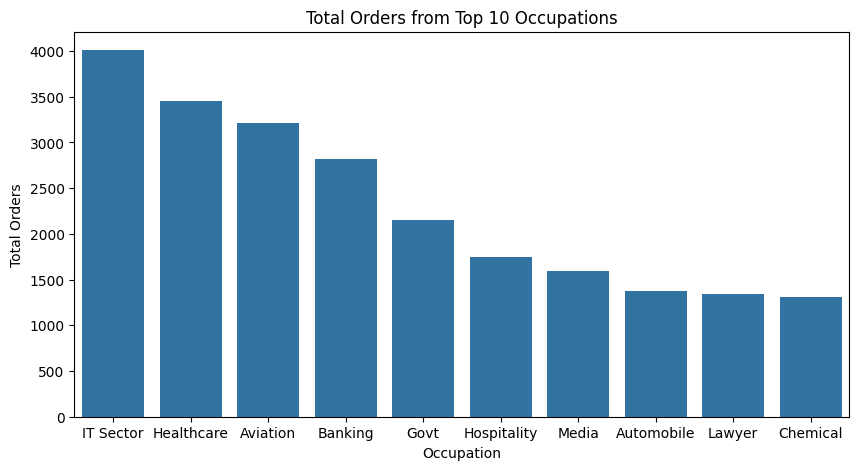

In [ ]:
sales_occupation = df.groupby(['Occupation'])['Orders'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_occupation.index, y=sales_occupation.values)
plt.title('Total Orders from Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Total Orders')
plt.show()

## Q16. Draw the countplot to print the top 10 categories

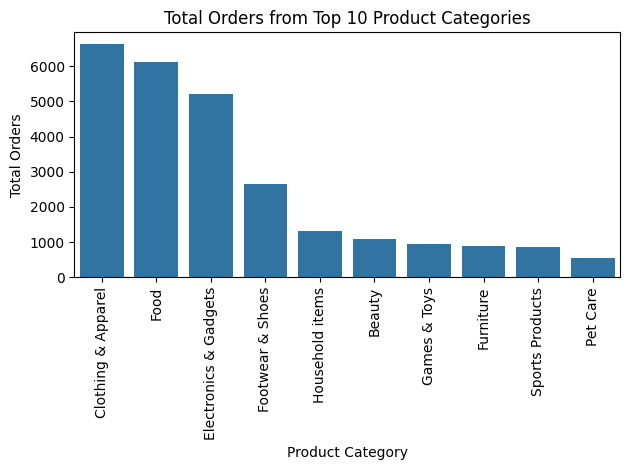

In [ ]:
sales_product_category = df.groupby(['Product_Category'])['Orders'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=sales_product_category.index, y=sales_product_category.values)
plt.title('Total Orders from Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Q17. What is the prodct ID of the top 10 most sold products.

In [ ]:
sales_product_id = df.groupby(['Product_ID'])['Orders'].sum().sort_values(ascending=False).head(10).index
print("Product IDs of the top 10 most sold products:")
sales_product_id

Product IDs of the top 10 most sold products:


Index(['P00265242', 'P00110942', 'P00237542', 'P00184942', 'P00114942',
       'P00025442', 'P00117942', 'P00145042', 'P00044442', 'P00110842'],
      dtype='object', name='Product_ID')

## Q18. What conclusion you can draw from the above visualizations.

In [ ]:
# Conclusion:
# *   The analysis reveals that married women between the ages of 26 and 35 years from Uttar Pradesh, Maharashtra, Karnataka and Delhi.
# *   These customers are predominantly engaged in occupations such as IT Sector, Healthcare, and Aviation
# *   They tend to favor product categories like Clothing and Apparel, Foods, Electronics and gadget.
# *   The Top 10 orders are from UttarPradesh, Maharshtra and Delhi.